In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor 
import pandas as pd
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [130]:

df = pd.read_csv(load_boston()["filename"], skiprows=1)
df.head()
X = df.iloc[:,0:12]
y = df.loc[:,['MEDV']]

sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 ) 


In [117]:
regr = DecisionTreeRegressor(random_state = 0) 
regr.fit(X_train, y_train)
print("Train accuracy", regr.score(X_train, y_train))
print("Test accuracy",regr.score(X_test, y_test))
# Похоже на переобучение

Train accuracy 1.0
Test accuracy 0.5321768998756563


In [118]:

regr = DecisionTreeRegressor(random_state = 0, max_depth=5) 
regr.fit(X_train, y_train)
print("Train accuracy", regr.score(X_train, y_train))
print("Test accuracy",regr.score(X_test, y_test))
# уже лучше

Train accuracy 0.8685131650587313
Test accuracy 0.606293085384774


In [139]:
params = [ {'max_depth': [1,3,4,5,6,7,10,15], 'min_samples_leaf':[2,5,7,8,9,10,12,15,20]} ]
gs = GridSearchCV( DecisionTreeRegressor(), param_grid = params, cv=8, scoring = 'r2', return_train_score = False )
gs.fit( X_train, y_train )

GridSearchCV(cv=8, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 3, 4, 5, 6, 7, 10, 15],
                          'min_samples_leaf': [2, 5, 7, 8, 9, 10, 12, 15, 20]}],
             scoring='r2')

In [138]:
gs.best_params_

{'max_depth': 4, 'min_samples_leaf': 9}

In [140]:
regr = DecisionTreeRegressor(random_state = 0, max_depth=4, min_samples_leaf=9) 
regr.fit(X_train, y_train)
print("Train accuracy", regr.score(X_train, y_train))
print("Test accuracy",regr.score(X_test, y_test))

Train accuracy 0.7605438518387317
Test accuracy 0.7349091953673952


In [141]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_5 <= 0.94
|   |--- feature_4 <= 0.99
|   |   |--- feature_5 <= 0.37
|   |   |   |--- feature_10 <= 1.15
|   |   |   |   |--- value: [21.21]
|   |   |   |--- feature_10 >  1.15
|   |   |   |   |--- value: [16.95]
|   |   |--- feature_5 >  0.37
|   |   |   |--- feature_9 <= -0.83
|   |   |   |   |--- value: [30.32]
|   |   |   |--- feature_9 >  -0.83
|   |   |   |   |--- value: [26.63]
|   |--- feature_4 >  0.99
|   |   |--- feature_0 <= 0.40
|   |   |   |--- feature_6 <= 0.83
|   |   |   |   |--- value: [20.04]
|   |   |   |--- feature_6 >  0.83
|   |   |   |   |--- value: [15.58]
|   |   |--- feature_0 >  0.40
|   |   |   |--- feature_0 <= 0.92
|   |   |   |   |--- value: [12.32]
|   |   |   |--- feature_0 >  0.92
|   |   |   |   |--- value: [9.09]
|--- feature_5 >  0.94
|   |--- feature_5 <= 1.64
|   |   |--- feature_4 <= -0.57
|   |   |   |--- feature_7 <= 1.41
|   |   |   |   |--- value: [35.10]
|   |   |   |--- feature_7 >  1.41
|   |   |   |   |--- value: [32.25]
|   

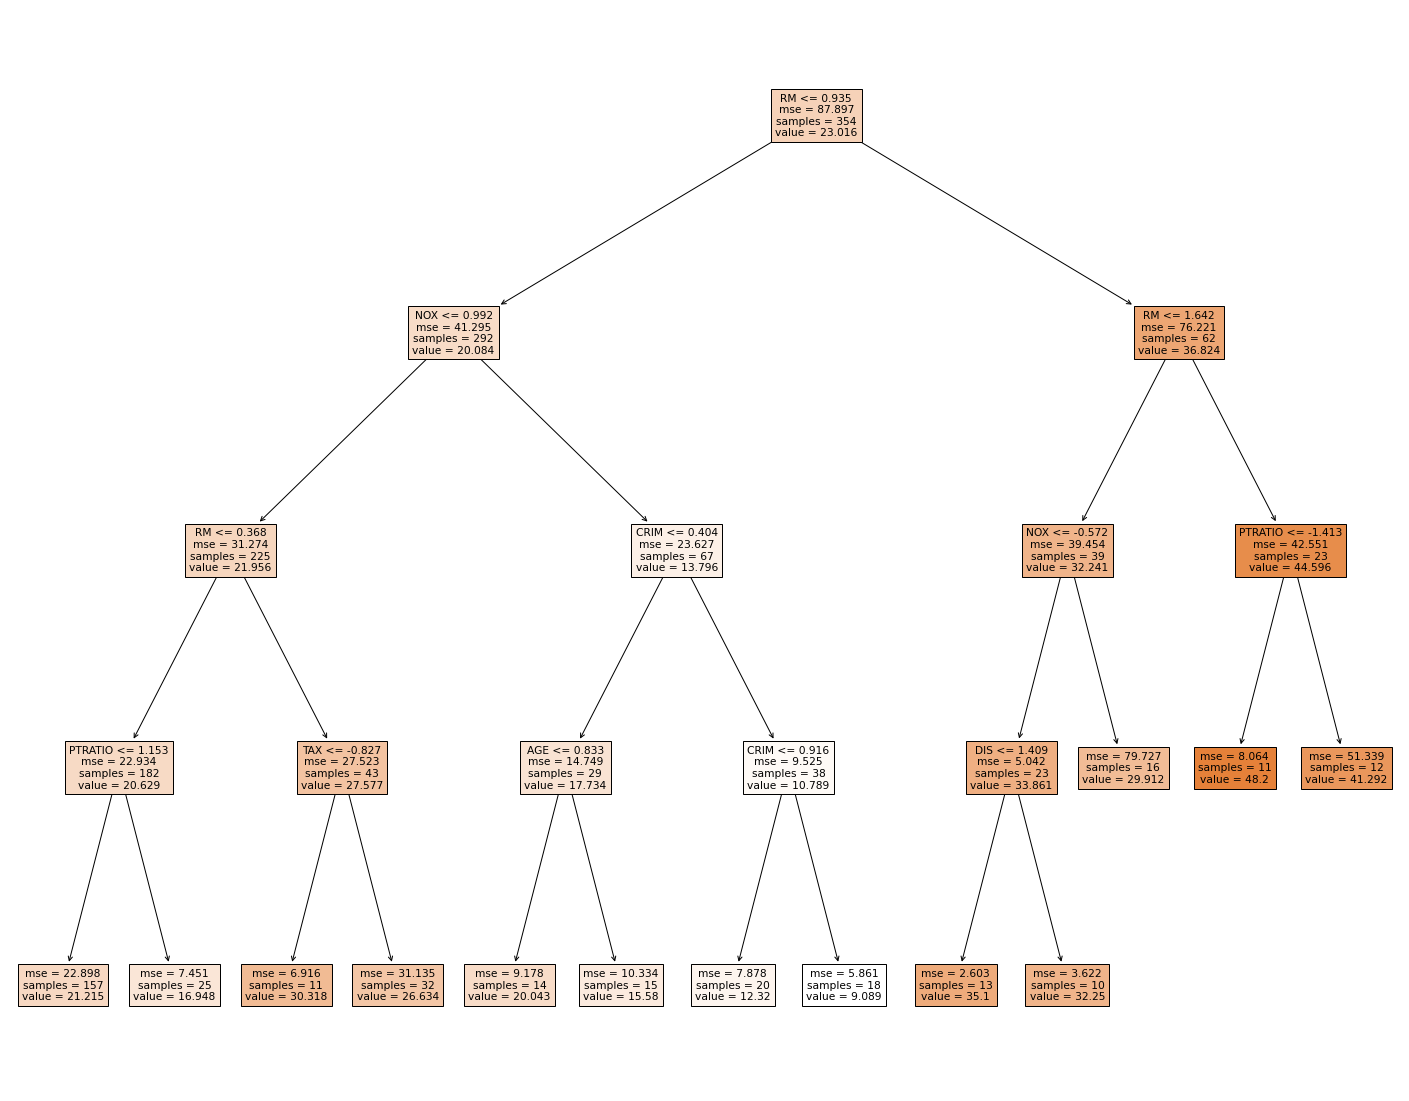

In [142]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=list(df.columns), filled=True)